In [64]:
import h2o
import psutil
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OGradientBoostingEstimator
import pandas as pd
import numpy as np
from h2o.estimators.random_forest import H2ORandomForestEstimator
import matplotlib.pyplot as plt

In [2]:
pct_memory=4
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

8


In [3]:
h2o.init(strict_version_check=False,max_mem_size=min_mem_size)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/25/079nl8ps1d17m_b9mm9cwnhm0000gn/T/tmpp_c51ipx
  JVM stdout: /var/folders/25/079nl8ps1d17m_b9mm9cwnhm0000gn/T/tmpp_c51ipx/h2o_guruisi_started_from_python.out
  JVM stderr: /var/folders/25/079nl8ps1d17m_b9mm9cwnhm0000gn/T/tmpp_c51ipx/h2o_guruisi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,"1 year, 3 months and 23 days !!!"
H2O cluster name:,H2O_from_python_guruisi_r1jxcs
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [167]:
data_path = "../data/Churn_Train.csv"
df = pd.read_csv(data_path)

In [168]:
df['Id'] = df.index

In [170]:
df.to_csv("../data/Churn.csv", index = False)

In [171]:
data_path = "../data/Churn.csv"
df = h2o.import_file(data_path)

In [172]:
df.head(5)

CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Id
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No,3
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes,4


In [173]:
df.isna().sum()

9.0

In [174]:
df = df.na_omit()

In [175]:
df.isna().sum()

0.0

In [176]:
target = 'Churn'
X = list(set(df.columns) - set(['Churn']) - set(['CustomerID']) - set(['Id']))
X

['Online Backup',
 'Phone Service',
 'Partner',
 'Senior Citizen',
 'Contract',
 'Device Protection',
 'Tenure',
 'Gender',
 'Internet Service',
 'Online Security',
 'Monthly Charges',
 'Paperless Billing',
 'Streaming Movies',
 'Multiple Lines',
 'Payment Method',
 'Tech Support',
 'Dependents',
 'Total Charges',
 'Streaming TV']

In [94]:
aml = H2OAutoML(max_runtime_secs=600)

In [14]:
aml.train(x=X,y=target,training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [15]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,StackedEnsemble_BestOfFamily_AutoML_20200809_1...,0.850180,0.417073,0.226777,0.366226,0.134121
1,GBM_grid_1_AutoML_20200809_184844_model_18,0.850156,0.409682,0.230198,0.364476,0.132843
2,GBM_grid_1_AutoML_20200809_184844_model_20,0.849776,0.410381,0.234533,0.364628,0.132953
3,StackedEnsemble_AllModels_AutoML_20200809_184844,0.849452,0.417161,0.228774,0.366490,0.134315
4,GBM_grid_1_AutoML_20200809_184844_model_16,0.849246,0.411673,0.238235,0.365142,0.133329
5,GBM_grid_1_AutoML_20200809_184844_model_12,0.848980,0.452791,0.234555,0.381081,0.145222
6,GBM_grid_1_AutoML_20200809_184844_model_14,0.848974,0.412404,0.225886,0.365270,0.133422
7,GBM_grid_1_AutoML_20200809_224838_model_8,0.848855,0.431964,0.240782,0.372267,0.138582
8,GBM_grid_1_AutoML_20200809_184844_model_3,0.848788,0.432952,0.237229,0.372787,0.138970
9,GBM_grid_1_AutoML_20200809_184844_model_1,0.848785,0.434713,0.228669,0.373369,0.139405


In [19]:
gbm_model_local = h2o.get_model('GBM_grid_1_AutoML_20200809_184844_model_18')
logistic_model_local = H2OGeneralizedLinearEstimator(family = "binomial")
xgboost_model_local = h2o.get_model('XGBoost_grid_1_AutoML_20200809_224838_model_9')

In [177]:
# cast to factor
df[1] = df[1].asfactor()

# Random UNIform numbers, one per row
r = df[0].runif()

# 60% for training data
train = df[ r < 0.6 ]

# 30% for validation
valid = df[ (0.6 <= r) & (r < 0.9) ]

# 10% for testing
test  = df[ 0.9 <= r ]

In [178]:
train.nrows

3885

## 1 Logistic Regression

In [124]:
logistic_model_local.train(x=X,
                           y= target,
                           training_frame = train,
                           validation_frame = valid)

In [125]:
logistic_model_local

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1597013319592_17144


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1313121673914865
RMSE: 0.36237020764887184
LogLoss: 0.40633115377777673
Null degrees of freedom: 3863
Residual degrees of freedom: 3836
Null deviance: 4482.797889446194
Residual deviance: 3140.127156394658
AIC: 3196.127156394658
AUC: 0.8558425142502644
pr_auc: 0.6758682461569124
Gini: 0.7116850285005287
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25859197421042557: 


,No,Yes,Error,Rate
No,2088.0,745.0,0.263,(745.0/2833.0)
Yes,181.0,850.0,0.1756,(181.0/1031.0)
Total,2269.0,1595.0,0.2396,(926.0/3864.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2585920,0.6473724,241.0
max f2,0.1563713,0.7615521,288.0
max f0point5,0.5398616,0.6524909,122.0
max accuracy,0.5398616,0.8115942,122.0
max precision,0.8750044,1.0,0.0
max recall,0.0031143,1.0,397.0
max specificity,0.8750044,1.0,0.0
max absolute_mcc,0.2585920,0.5044077,241.0
max min_per_class_accuracy,0.2989662,0.7720660,223.0
max mean_per_class_accuracy,0.2585920,0.7807351,241.0


Gains/Lift Table: Avg response rate: 26.68 %, avg score: 26.69 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100932,0.8072080,3.2673282,3.2673282,0.8717949,0.8318661,0.8717949,0.8318661,0.0329777,0.0329777,226.7328210,226.7328210
,2,0.0201863,0.7867289,3.0751324,3.1712303,0.8205128,0.7973382,0.8461538,0.8146022,0.0310378,0.0640155,207.5132433,217.1230322
,3,0.0300207,0.7708700,3.2546838,3.1985685,0.8684211,0.7784711,0.8534483,0.8027661,0.0320078,0.0960233,225.4683751,219.8568514
,4,0.0401139,0.7558323,3.2673282,3.2158693,0.8717949,0.7653157,0.8580645,0.7933431,0.0329777,0.1290010,226.7328210,221.5869341
,5,0.0502070,0.7380001,2.7868388,3.1296209,0.7435897,0.7467696,0.8350515,0.7839804,0.0281280,0.1571290,178.6838767,212.9620927
,6,0.1001553,0.6729028,2.8351367,2.9827593,0.7564767,0.7046722,0.7958656,0.7444288,0.1416101,0.2987391,183.5136670,198.2759269
,7,0.1501035,0.6071369,2.3885056,2.7850162,0.6373057,0.6387067,0.7431034,0.7092489,0.1193016,0.4180407,138.8505551,178.5016221
,8,0.2000518,0.5381941,2.0778056,2.6084423,0.5544041,0.5722402,0.6959897,0.6750410,0.1037827,0.5218235,107.7805642,160.8442299
,9,0.2999482,0.3962338,1.5437902,2.2538645,0.4119171,0.4683588,0.6013805,0.6062064,0.1542192,0.6760427,54.3790173,125.3864456
,10,0.4001035,0.2677629,1.2976940,2.0145126,0.3462532,0.3286738,0.5375162,0.5367335,0.1299709,0.8060136,29.7693968,101.4512593




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13988195347217955
RMSE: 0.3740079591027169
LogLoss: 0.42669574270102295
Null degrees of freedom: 1963
Residual degrees of freedom: 1936
Null deviance: 2254.1867641245126
Residual deviance: 1676.060877329618
AIC: 1732.060877329618
AUC: 0.8334476691632231
pr_auc: 0.6085277427369343
Gini: 0.6668953383264462
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3933891185861035: 


,No,Yes,Error,Rate
No,1189.0,263.0,0.1811,(263.0/1452.0)
Yes,163.0,349.0,0.3184,(163.0/512.0)
Total,1352.0,612.0,0.2169,(426.0/1964.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3933891,0.6209964,177.0
max f2,0.1467309,0.7441787,296.0
max f0point5,0.5139588,0.6147913,124.0
max accuracy,0.5208544,0.7998982,121.0
max precision,0.8712309,1.0,0.0
max recall,0.0066205,1.0,393.0
max specificity,0.8712309,1.0,0.0
max absolute_mcc,0.3933891,0.4744255,177.0
max min_per_class_accuracy,0.3241675,0.7519531,210.0
max mean_per_class_accuracy,0.2878493,0.7594885,226.0


Gains/Lift Table: Avg response rate: 26.07 %, avg score: 27.45 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101833,0.8083745,3.0687500,3.0687500,0.8,0.8366588,0.8,0.8366588,0.03125,0.03125,206.8750000,206.8750000
,2,0.0203666,0.7814955,2.4933594,2.7810547,0.65,0.7940115,0.725,0.8153352,0.0253906,0.0566406,149.3359375,178.1054688
,3,0.0300407,0.7625985,2.8264803,2.7956833,0.7368421,0.7728231,0.7288136,0.8016448,0.0273438,0.0839844,182.6480263,179.5683263
,4,0.0402240,0.7433646,2.8769531,2.8162579,0.75,0.7519586,0.7341772,0.7890660,0.0292969,0.1132812,187.6953125,181.6257911
,5,0.0504073,0.7278637,2.8769531,2.8285196,0.75,0.7359333,0.7373737,0.7783321,0.0292969,0.1425781,187.6953125,182.8519571
,6,0.1003055,0.6504495,2.5051020,2.6676317,0.6530612,0.6902004,0.6954315,0.7344900,0.125,0.2675781,150.5102041,166.7631662
,7,0.1502037,0.5958767,2.3485332,2.5616261,0.6122449,0.6207043,0.6677966,0.6966900,0.1171875,0.3847656,134.8533163,156.1626059
,8,0.2001018,0.5365627,2.0745376,2.4401638,0.5408163,0.5687102,0.6361323,0.6647764,0.1035156,0.4882812,107.4537628,144.0163804
,9,0.2998982,0.4021287,1.7222577,2.2012680,0.4489796,0.4687213,0.5738540,0.5995357,0.171875,0.6601562,72.2257653,120.1268039
,10,0.4002037,0.2980178,1.2072494,1.9521310,0.3147208,0.3501028,0.5089059,0.5370188,0.1210938,0.78125,20.7249365,95.2131043



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2020-08-10 08:10:16,0.000 sec,0,2241.3989447,0.5800722
,2020-08-10 08:10:16,0.017 sec,1,1654.2086472,0.4289863
,2020-08-10 08:10:16,0.028 sec,2,1585.7817876,0.4114282
,2020-08-10 08:10:16,0.031 sec,3,1571.8949395,0.4081494
,2020-08-10 08:10:16,0.035 sec,4,1570.1412044,0.4078462
,2020-08-10 08:10:16,0.039 sec,5,1570.0635782,0.4078434


In [126]:
logistic_model_local.model_performance(test_data=test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13676664581603143
RMSE: 0.36981974773669324
LogLoss: 0.41905124614571654
Null degrees of freedom: 661
Residual degrees of freedom: 634
Null deviance: 758.6431182843685
Residual deviance: 554.8238498969288
AIC: 610.8238498969288
AUC: 0.8399264356905553
pr_auc: 0.642954585445394
Gini: 0.6798528713811105
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30243924348259327: 


,No,Yes,Error,Rate
No,369.0,121.0,0.2469,(121.0/490.0)
Yes,37.0,135.0,0.2151,(37.0/172.0)
Total,406.0,256.0,0.2387,(158.0/662.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3024392,0.6308411,193.0
max f2,0.1422109,0.7490637,271.0
max f0point5,0.5192027,0.6445313,110.0
max accuracy,0.5192027,0.8141994,110.0
max precision,0.8750186,1.0,0.0
max recall,0.0137343,1.0,379.0
max specificity,0.8750186,1.0,0.0
max absolute_mcc,0.5110350,0.4988469,111.0
max min_per_class_accuracy,0.3130038,0.7591837,187.0
max mean_per_class_accuracy,0.3024392,0.7689725,193.0


Gains/Lift Table: Avg response rate: 25.98 %, avg score: 27.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105740,0.8028264,3.8488372,3.8488372,1.0,0.8344546,1.0,0.8344546,0.0406977,0.0406977,284.8837209,284.8837209
,2,0.0211480,0.7855657,3.2990033,3.5739203,0.8571429,0.7949672,0.9285714,0.8147109,0.0348837,0.0755814,229.9003322,257.3920266
,3,0.0302115,0.7630627,2.5658915,3.2715116,0.6666667,0.7721759,0.85,0.8019504,0.0232558,0.0988372,156.5891473,227.1511628
,4,0.0407855,0.7516464,3.2990033,3.2786391,0.8571429,0.7580396,0.8518519,0.7905661,0.0348837,0.1337209,229.9003322,227.8639104
,5,0.0513595,0.7319520,3.2990033,3.2828317,0.8571429,0.7393147,0.8529412,0.7800144,0.0348837,0.1686047,229.9003322,228.2831737
,6,0.1012085,0.6708461,2.2159972,2.7573759,0.5757576,0.6986010,0.7164179,0.7399152,0.1104651,0.2790698,121.5997181,175.7375911
,7,0.1510574,0.6110156,2.0993658,2.5402326,0.5454545,0.6368209,0.66,0.7058941,0.1046512,0.3837209,109.9365751,154.0232558
,8,0.2009063,0.5535949,2.6825229,2.5755377,0.6969697,0.5807483,0.6691729,0.6748429,0.1337209,0.5174419,168.2522903,157.5537681
,9,0.3006042,0.3961013,1.3412615,2.1661797,0.3484848,0.4753281,0.5628141,0.6086721,0.1337209,0.6511628,34.1261452,116.6179736
,10,0.4003021,0.2801609,1.3995772,1.9752523,0.3636364,0.3394054,0.5132075,0.5416095,0.1395349,0.7906977,39.9577167,97.5252304


#### Variable Importance

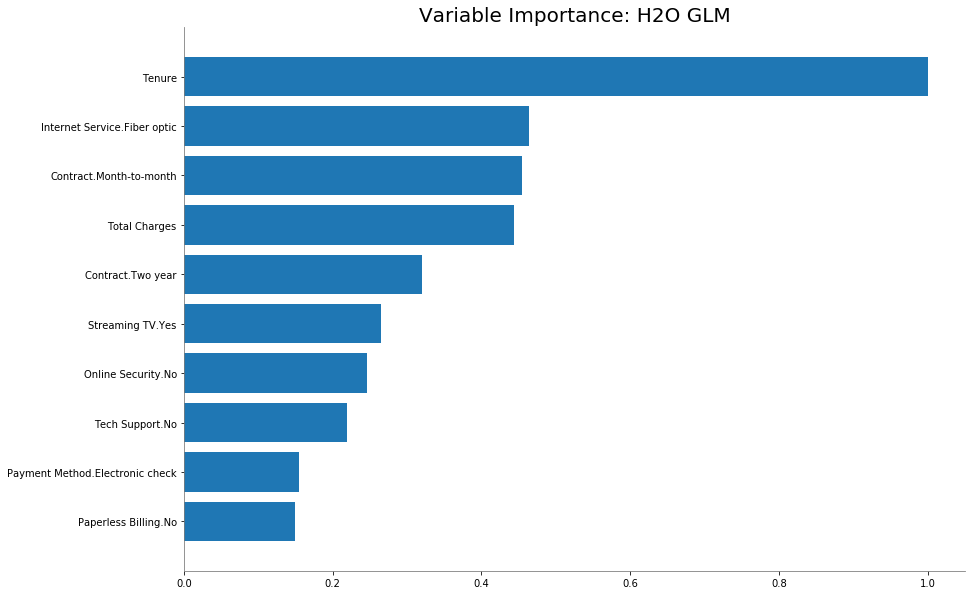

In [127]:
logistic_model_local.varimp_plot()

#### Partial Dependence Plot

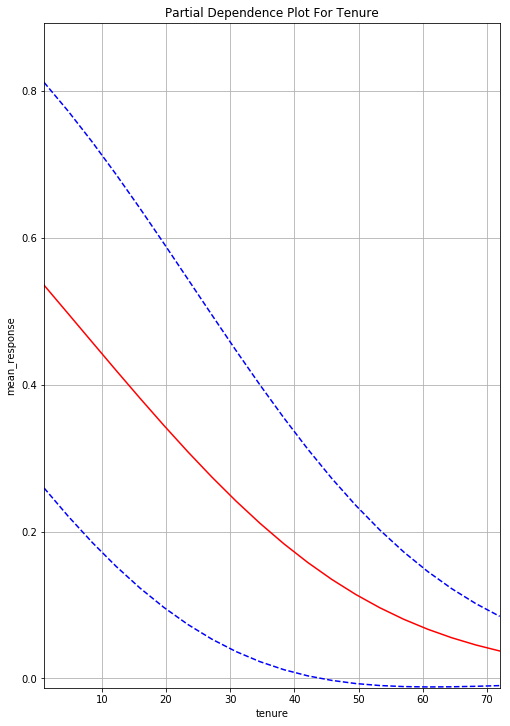

In [142]:
Tenure_PDP = logistic_model_local.partial_plot(data=df, cols=['Tenure'], plot=True, plot_stddev=True)

PartialDependence: Partial Dependence Plot of model GLM_model_python_1597013319592_17144 on column 'Total Charges'



total_charges,mean_response,stddev_response,std_error_mean_response
18.8,0.2137070,0.2401651,0.0038636
474.9052632,0.2284907,0.2505882,0.0040313
931.0105263,0.2436702,0.2606659,0.0041934
1387.1157895,0.2592092,0.2703500,0.0043492
1843.2210526,0.2750709,0.2795973,0.0044979
2299.3263158,0.2912182,0.2883697,0.0046391
2755.4315789,0.3076140,0.2966338,0.0047720
3211.5368421,0.3242221,0.3043611,0.0048963
3667.6421053,0.3410069,0.3115273,0.0050116
4123.7473684,0.3579340,0.3181119,0.0051175


[]

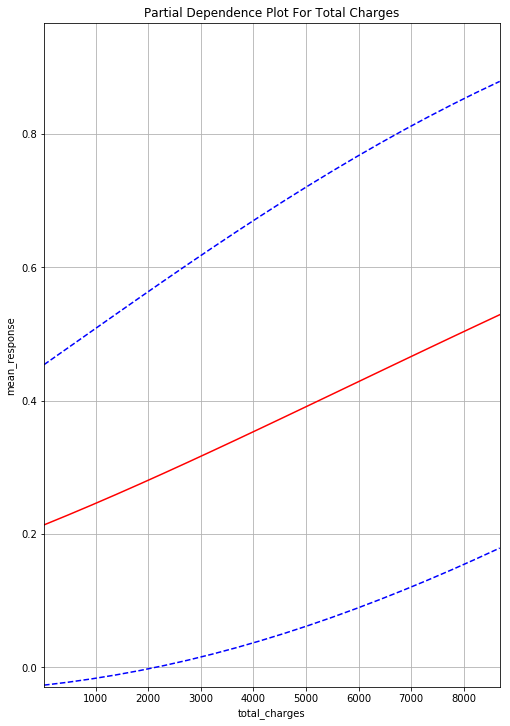

In [129]:
logistic_model_local.partial_plot(data=train, cols=['Total Charges'], plot=True, plot_stddev=True)

In [132]:
# manually calculate 2-D partial dependence

def par_dep_2d(xs1, xs2, frame, model, resolution=20):
    
    """ Creates Pandas dataframe containing partial dependence for two variables.
    
    Args:
        xs1: First variable for which to calculate partial dependence.
        xs2: Second variable for which to calculate partial dependence.
        frame: Data for which to calculate partial dependence.
        model: Model for which to calculate partial dependence.
        resolution: The number of points across the domain of xs for which to calculate partial dependence.
    
    Returns:
        Pandas dataframe containing partial dependence values.
        
    """
    
    # init empty Pandas frame w/ correct col names
    par_dep_frame = pd.DataFrame(columns=[xs1, xs2, 'partial_dependence'])
    
    # cache original data 
    col_cache1 = frame[xs1]
    col_cache2 = frame[xs2] 
    
    # determine values at which to calculate partial dependency
    # for xs1
    min1_ = frame[xs1].min()
    max1_ = frame[xs1].max()
    by1 = float((max1_ - min1_)/resolution)
    print("min1:" + str(min1_))
    print("max1_" + str(max1_))
    print("by1" + str(by1))
    range1 = np.arange(min1_, max1_, by1)
    
    # determine values at which to calculate partial dependency
    # for xs2
    min2_ = frame[xs2].min()
    max2_ = frame[xs2].max()
    by2 = float((max2_ - min2_)/resolution)
    print("min2:" + str(min2_))
    print("max2_" + str(max2_))
    print("by2" + str(by2))
    range2 = np.arange(min2_, max2_, by2)  
    
    # calculate partial dependency 
    for j in range1:
        for k in range2:
            frame[xs1] = j
            frame[xs2] = k
            par_dep_i = model.predict(frame)
            par_dep_j = par_dep_i.mean()[0]
            std_j = model.predict(frame).sd()[0]
            pos_std, neg_std = par_dep_j + std_j, par_dep_j - std_j
            par_dep_frame = par_dep_frame.append({xs1:j,
                                                  xs2:k,
                                                  'partial_dependence': par_dep_j}, 
                                                  ignore_index=True)

    # return input frame to original cached state    
    frame[xs1] = col_cache1
    frame[xs2] = col_cache2

    return par_dep_frame


In [134]:
# calculate 2-D partial dependence
h2o.no_progress()
resolution = 20
par_dep_Tenure_v_TotalCharges = par_dep_2d('Tenure',
                                           'Total Charges',
                                           df,
                                           logistic_model_local,
                                           resolution=resolution)

print(par_dep_Tenure_v_TotalCharges)

min1:1.0
max1_72.0
by13.55
min2:18.8
max2_8684.8
by2433.3
     Tenure  Total Charges  partial_dependence
0      1.00           18.8            0.501233
1      1.00          452.1            0.528659
2      1.00          885.4            0.557627
3      1.00         1318.7            0.592142
4      1.00         1752.0            0.618952
5      1.00         2185.3            0.649615
6      1.00         2618.6            0.675347
7      1.00         3051.9            0.700000
8      1.00         3485.2            0.722804
9      1.00         3918.5            0.769492
10     1.00         4351.8            0.798613
11     1.00         4785.1            0.824037
12     1.00         5218.4            0.841757
13     1.00         5651.7            0.865177
14     1.00         6085.0            0.893837
15     1.00         6518.3            0.921880
16     1.00         6951.6            0.940524
17     1.00         7384.9            0.955778
18     1.00         7818.2            0.976579
19

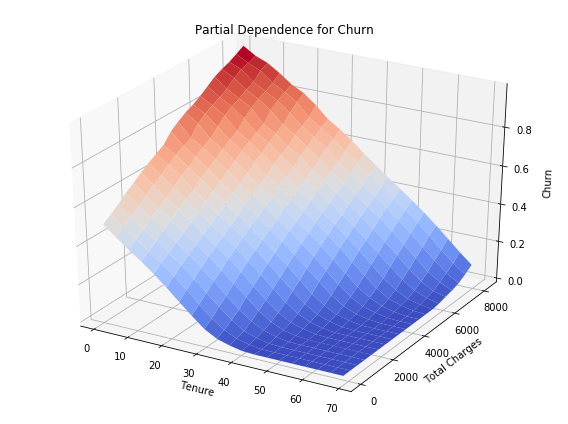

In [137]:
# create 2-D partial dependence plot

# imports
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# create 3-D grid 
new_shape = (resolution, resolution)
x = np.asarray(par_dep_Tenure_v_TotalCharges['Tenure']).reshape(new_shape)
y = np.asarray(par_dep_Tenure_v_TotalCharges['Total Charges']).reshape(new_shape)
z = np.asarray(par_dep_Tenure_v_TotalCharges['partial_dependence']).reshape(new_shape)


fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

# set axes labels
ax.set_title('Partial Dependence for Churn')
ax.set_xlabel('Tenure')
ax.set_ylabel('Total Charges')
ax.set_zlabel('\nChurn')

# axis decorators/details
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# surface
surf = ax.plot_surface(x, y, z, 
                       cmap=cm.coolwarm, 
                       linewidth=0.05, 
                       rstride=1, 
                       cstride=1, 
                       antialiased=True)
plt.tight_layout()

_ = plt.show()


#### Individual Conditional Expectation

In [203]:
# manually calculate 1-D partial dependence
# for educational purposes

def par_dep(xs, frame, model, resolution=20, bins=None):
    
    """ Creates Pandas dataframe containing partial dependence for a single variable.
    
    Args:
        xs: Variable for which to calculate partial dependence.
        frame: Data for which to calculate partial dependence.
        model: Model for which to calculate partial dependence.
        resolution: The number of points across the domain of xs for which to calculate partial dependence.
    
    Returns:
        Pandas dataframe containing partial dependence values.
        
    """
    
    # init empty Pandas frame w/ correct col names
    par_dep_frame = pd.DataFrame(columns=[xs, 'partial_dependence'])
    
    # cache original data 
    col_cache = h2o.deep_copy(frame[xs], xid='col_cache')
  
    # determine values at which to calculate partial dependency
    if bins == None:
        min_ = frame[xs].min()
        max_ = frame[xs].max()
        by = (max_ - min_)/resolution
        bins = np.arange(min_, max_, by)
        
    # calculate partial dependency  
    # by setting column of interest to constant 
    for j in bins:
        frame[xs] = j
        par_dep_i = model.predict(frame)
        par_dep_j = par_dep_i.mean()[0]
        par_dep_frame = par_dep_frame.append({xs:j,
                                              'partial_dependence': par_dep_j}, 
                                              ignore_index=True)
        
    # return input frame to original cached state    
    frame[xs] = h2o.get_frame('col_cache')

    return par_dep_frame

# show some output
par_dep_Tenure = par_dep('Tenure', df, logistic_model_local)
# par_dep_Tenure.plot.line(x='Tenure', y='partial_dependence')
# print(par_dep_Tenure)

In [181]:
def get_quantile_dict(y, id_, frame):

    """ Returns the percentiles of a column y as the indices for another column id_.
    
    Args:
        y: Column in which to find percentiles.
        id_: Id column that stores indices for percentiles of y.
        frame: H2OFrame containing y and id_. 
    
    Returns:
        Dictionary of percentile values and index column values.
    
    """
    
    quantiles_df = frame.as_data_frame()
    quantiles_df.sort_values(y, inplace=True)
    quantiles_df.reset_index(inplace=True)
    
    percentiles_dict = {}
    percentiles_dict[0] = quantiles_df.loc[0, id_]
    percentiles_dict[99] = quantiles_df.loc[quantiles_df.shape[0]-1, id_]
    inc = quantiles_df.shape[0]//10
    
    for i in range(1, 10):
        percentiles_dict[i * 10] = quantiles_df.loc[i * inc,  id_]

    return percentiles_dict

quantile_dict = get_quantile_dict('Churn', 'Id', df)

In [183]:
bins = list(par_dep_Tenure['Tenure'])
for i in sorted(quantile_dict.keys()):
    col_name = 'Percentile_' + str(i)
    par_dep_Tenure[col_name] = par_dep('Tenure',
                                   df[df['Id'] == int(quantile_dict[i])],
                                   logistic_model_local,
                                   bins=bins)['partial_dependence']
par_dep_Tenure

,Tenure,partial_dependence,Percentile_0,Percentile_10,Percentile_20,Percentile_30,Percentile_40,Percentile_50,Percentile_60,Percentile_70,Percentile_80,Percentile_90,Percentile_99
0,1.00,0.655008,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,4.55,0.608783,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,8.10,0.559630,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,11.65,0.513713,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,15.20,0.469954,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,18.75,0.426502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,22.30,0.378582,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,25.85,0.320493,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,29.40,0.269337,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,32.95,0.212481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


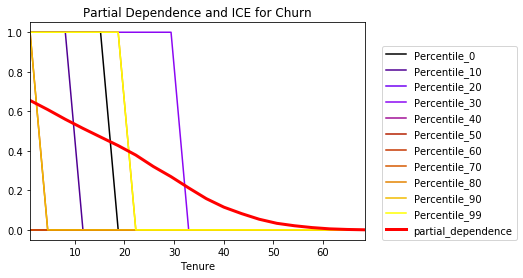

In [184]:
fig, ax = plt.subplots()
par_dep_Tenure.drop('partial_dependence', axis=1).plot(x='Tenure', colormap='gnuplot', ax=ax)

par_dep_Tenure.plot(title='Partial Dependence and ICE for Churn',
                         x='Tenure', 
                         y='partial_dependence',
                         style='r-', 
                         linewidth=3, 
                         ax=ax)

_ = plt.legend(bbox_to_anchor=(1.05, 0),
               loc=3, 
               borderaxespad=0.)

## 2 Gradient Boosting Machine

In [185]:
# gbm_model_local = h2o.get_model('GBM_grid_1_AutoML_20200809_184844_model_18')
gbm_model_local.train(x=X, y=target, training_frame=train, validation_frame = valid)

In [186]:
gbm_model_local.model_performance()


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10317340756401237
RMSE: 0.32120617609879853
LogLoss: 0.3305658187390948
Mean Per-Class Error: 0.15369427869427865
AUC: 0.9176863520492865
pr_auc: 0.8046855934562773
Gini: 0.835372704098573
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3760811955332678: 


,No,Yes,Error,Rate
No,2495.0,354.0,0.1243,(354.0/2849.0)
Yes,214.0,822.0,0.2066,(214.0/1036.0)
Total,2709.0,1176.0,0.1462,(568.0/3885.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3760812,0.7432188,201.0
max f2,0.2599200,0.8228181,249.0
max f0point5,0.5358469,0.7384654,137.0
max accuracy,0.4226923,0.8550837,183.0
max precision,0.9288880,1.0,0.0
max recall,0.0296397,1.0,382.0
max specificity,0.9288880,1.0,0.0
max absolute_mcc,0.3760812,0.6441133,201.0
max min_per_class_accuracy,0.3300302,0.8378378,220.0
max mean_per_class_accuracy,0.2818741,0.8463057,240.0


Gains/Lift Table: Avg response rate: 26.67 %, avg score: 26.69 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100386,0.8899302,3.75,3.75,1.0,0.9065725,1.0,0.9065725,0.0376448,0.0376448,275.0,275.0
,2,0.0200772,0.8579185,3.5576923,3.6538462,0.9487179,0.8778309,0.9743590,0.8922017,0.0357143,0.0733591,255.7692308,265.3846154
,3,0.0301158,0.8366076,3.6538462,3.6538462,0.9743590,0.8478174,0.9743590,0.8774069,0.0366795,0.1100386,265.3846154,265.3846154
,4,0.0404118,0.8169945,3.28125,3.5589172,0.875,0.8268917,0.9490446,0.8645368,0.0337838,0.1438224,228.125,255.8917197
,5,0.0501931,0.7901430,3.3552632,3.5192308,0.8947368,0.8036881,0.9384615,0.8526791,0.0328185,0.1766409,235.5263158,251.9230769
,6,0.1001287,0.6838086,3.3827320,3.4511568,0.9020619,0.7367699,0.9203085,0.7948735,0.1689189,0.3455598,238.2731959,245.1156812
,7,0.1500644,0.5917246,2.5322165,3.1453688,0.6752577,0.6386479,0.8387650,0.7428876,0.1264479,0.4720077,153.2216495,214.5368782
,8,0.2,0.5229638,2.3002577,2.9343629,0.6134021,0.5565991,0.7824968,0.6963754,0.1148649,0.5868726,130.0257732,193.4362934
,9,0.3001287,0.3784853,2.0051414,2.6243568,0.5347044,0.4510177,0.6998285,0.6145194,0.2007722,0.7876448,100.5141388,162.4356775
,10,0.4,0.2616369,1.1501289,2.2562741,0.3067010,0.3181251,0.6016731,0.5405162,0.1148649,0.9025097,15.0128866,125.6274131


#### Variable Importance

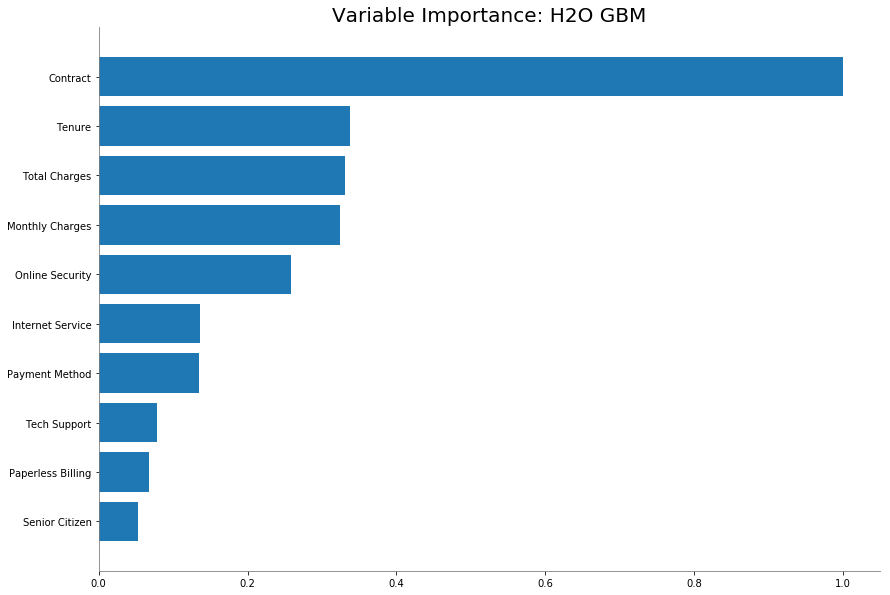

In [187]:
gbm_model_local.varimp_plot()

#### Partial Dependence Plot

PartialDependence: Partial Dependence Plot of model GBM_model_python_1597013319592_18792 on column 'Tenure'



tenure,mean_response,stddev_response,std_error_mean_response
1.0,0.4034221,0.2908955,0.0046670
4.7368421,0.3325176,0.2527814,0.0040555
8.4736842,0.3245015,0.2471217,0.0039647
12.2105263,0.2921240,0.2306489,0.0037005
15.9473684,0.2706254,0.2223178,0.0035668
19.6842105,0.2605981,0.2229685,0.0035772
23.4210526,0.2130585,0.1886440,0.0030265
27.1578947,0.2157993,0.1934324,0.0031034
30.8947368,0.2145211,0.1928156,0.0030935
34.6315789,0.2145211,0.1928156,0.0030935


[]

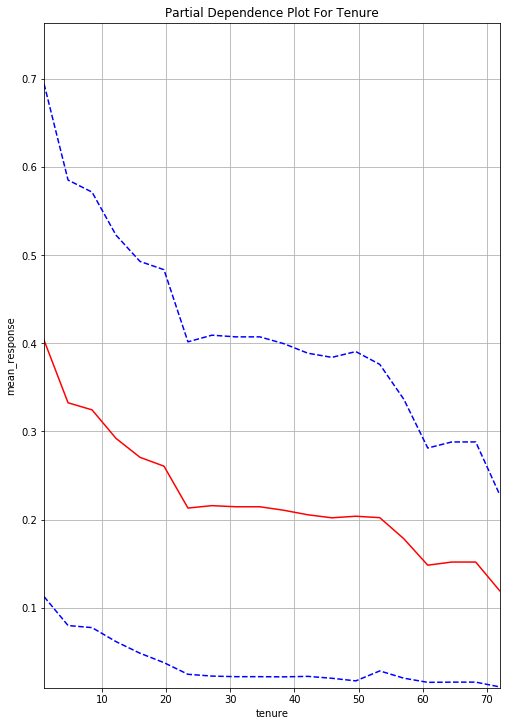

In [188]:
gbm_model_local.partial_plot(data=train, cols=['Tenure'], plot=True, plot_stddev=True)

PartialDependence: Partial Dependence Plot of model GBM_model_python_1597013319592_18792 on column 'Total Charges'



total_charges,mean_response,stddev_response,std_error_mean_response
18.8,0.2999703,0.2774126,0.0044507
467.6605263,0.2593645,0.2500084,0.0040111
916.5210526,0.2756536,0.2298681,0.0036879
1365.3815789,0.2670324,0.2321262,0.0037242
1814.2421053,0.2683494,0.2377486,0.0038144
2263.1026316,0.2771945,0.2405347,0.0038591
2711.9631579,0.2783816,0.2412736,0.0038709
3160.8236842,0.2531762,0.2227409,0.0035736
3609.6842105,0.2422233,0.2135560,0.0034262
4058.5447368,0.2508845,0.2205948,0.0035392


[]

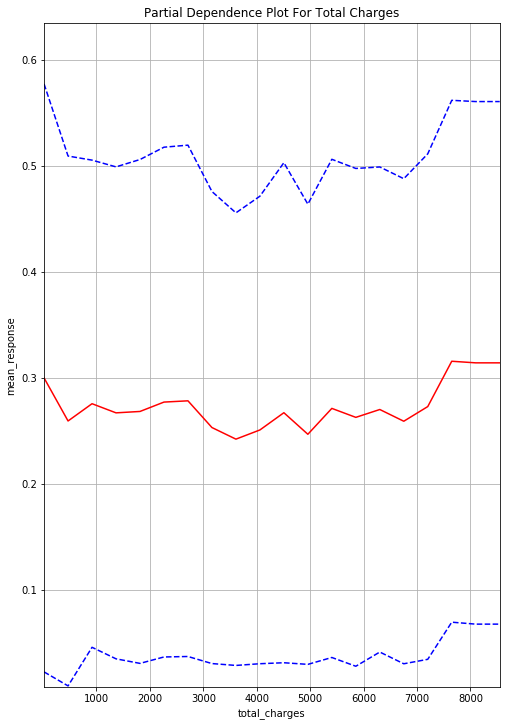

In [207]:
gbm_model_local.partial_plot(data=train, cols=['Total Charges'], plot=True, plot_stddev=True)

In [204]:
# calculate 2-D partial dependence
h2o.no_progress()
resolution = 20
par_dep_Tenure_v_TotalCharges_GBM = par_dep_2d('Tenure',
                                           'Total Charges',
                                           df,
                                           gbm_model_local,
                                           resolution=resolution)

print(par_dep_Tenure_v_TotalCharges_GBM)

min1:1.0
max1_72.0
by13.55
min2:18.8
max2_8684.8
by2433.3
     Tenure  Total Charges  partial_dependence
0      1.00           18.8            0.551926
1      1.00          452.1            0.528659
2      1.00          885.4            0.624499
3      1.00         1318.7            0.622958
4      1.00         1752.0            0.635285
5      1.00         2185.3            0.627735
6      1.00         2618.6            0.631433
7      1.00         3051.9            0.630508
8      1.00         3485.2            0.620339
9      1.00         3918.5            0.605701
10     1.00         4351.8            0.618336
11     1.00         4785.1            0.626656
12     1.00         5218.4            0.642373
13     1.00         5651.7            0.620647
14     1.00         6085.0            0.643914
15     1.00         6518.3            0.621109
16     1.00         6951.6            0.636980
17     1.00         7384.9            0.640062
18     1.00         7818.2            0.683513
19

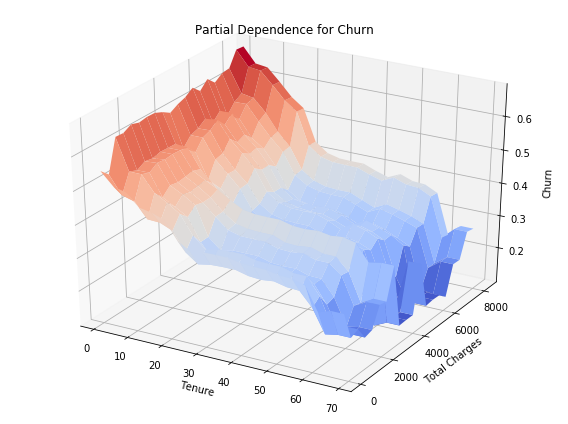

In [205]:
# create 3-D grid 
new_shape = (resolution, resolution)
x = np.asarray(par_dep_Tenure_v_TotalCharges_GBM['Tenure']).reshape(new_shape)
y = np.asarray(par_dep_Tenure_v_TotalCharges_GBM['Total Charges']).reshape(new_shape)
z = np.asarray(par_dep_Tenure_v_TotalCharges_GBM['partial_dependence']).reshape(new_shape)


fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

# set axes labels
ax.set_title('Partial Dependence for Churn')
ax.set_xlabel('Tenure')
ax.set_ylabel('Total Charges')
ax.set_zlabel('\nChurn')

# axis decorators/details
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# surface
surf = ax.plot_surface(x, y, z, 
                       cmap=cm.coolwarm, 
                       linewidth=0.05, 
                       rstride=1, 
                       cstride=1, 
                       antialiased=True)
plt.tight_layout()

_ = plt.show()


#### Individual Conditional Expectation

In [206]:
gbm_par_dep_Tenure = par_dep('Tenure', df, gbm_model_local)
# gbm_par_dep_Tenure.plot.line(x='Tenure', y='partial_dependence')
# print(gbm_par_dep_Tenure)

In [190]:
quantile_dict = get_quantile_dict('Churn', 'Id', df)

In [200]:
bins = list(gbm_par_dep_Tenure['Tenure'])
for i in sorted(quantile_dict.keys()):
    col_name = 'Percentile_' + str(i)
    gbm_par_dep_Tenure[col_name] = par_dep('Tenure',
                                   df[df['Id'] == int(quantile_dict[i])],
                                   gbm_model_local,
                                   bins=bins)['partial_dependence']
gbm_par_dep_Tenure

,Tenure,partial_dependence,Percentile_0,Percentile_10,Percentile_20,Percentile_30,Percentile_40,Percentile_50,Percentile_60,Percentile_70,Percentile_80,Percentile_90,Percentile_99
0,1.00,0.576888,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,4.55,0.507550,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,8.10,0.500000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,11.65,0.456086,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,15.20,0.443143,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,18.75,0.420339,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,22.30,0.359322,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,25.85,0.330354,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,29.40,0.337442,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,32.95,0.336826,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


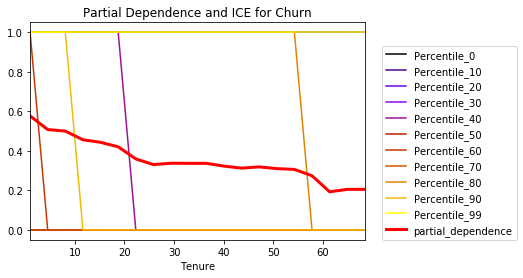

In [201]:
fig, ax = plt.subplots()
gbm_par_dep_Tenure.drop('partial_dependence', axis=1).plot(x='Tenure', colormap='gnuplot', ax=ax)

gbm_par_dep_Tenure.plot(title='Partial Dependence and ICE for Churn',
                         x='Tenure', 
                         y='partial_dependence',
                         style='r-', 
                         linewidth=3, 
                         ax=ax)

_ = plt.legend(bbox_to_anchor=(1.05, 0),
               loc=3, 
               borderaxespad=0.)

## 3 XGBoost

In [193]:
# xgboost_model_local = h2o.get_model('XGBoost_grid_1_AutoML_20200809_224838_model_9')
xgboost_model_local.train(x=X, y=target, training_frame=train, validation_frame = valid)
xgboost_model_local.model_performance()


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.06132453573019107
RMSE: 0.2476379125461024
LogLoss: 0.21775439530372342
Mean Per-Class Error: 0.06897156897156898
AUC: 0.979129370056011
pr_auc: 0.9411672125904095
Gini: 0.958258740112022
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4160831719636917: 


,No,Yes,Error,Rate
No,2682.0,167.0,0.0586,(167.0/2849.0)
Yes,91.0,945.0,0.0878,(91.0/1036.0)
Total,2773.0,1112.0,0.0664,(258.0/3885.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4160832,0.8798883,197.0
max f2,0.3003411,0.9168793,234.0
max f0point5,0.5387729,0.8942644,151.0
max accuracy,0.4264682,0.9341055,193.0
max precision,0.9776292,1.0,0.0
max recall,0.0642277,1.0,342.0
max specificity,0.9776292,1.0,0.0
max absolute_mcc,0.4160832,0.8350746,197.0
max min_per_class_accuracy,0.3879922,0.9285714,206.0
max mean_per_class_accuracy,0.3585542,0.9310284,215.0


Gains/Lift Table: Avg response rate: 26.67 %, avg score: 26.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100386,0.9424194,3.75,3.75,1.0,0.9552457,1.0,0.9552457,0.0376448,0.0376448,275.0,275.0
,2,0.0200772,0.9212297,3.6538462,3.7019231,0.9743590,0.9316404,0.9871795,0.9434430,0.0366795,0.0743243,265.3846154,270.1923077
,3,0.0301158,0.9050536,3.75,3.7179487,1.0,0.9124670,0.9914530,0.9331177,0.0376448,0.1119691,275.0,271.7948718
,4,0.0401544,0.8860434,3.75,3.7259615,1.0,0.8956389,0.9935897,0.9237480,0.0376448,0.1496139,275.0,272.5961538
,5,0.0501931,0.8648538,3.75,3.7307692,1.0,0.8763654,0.9948718,0.9142715,0.0376448,0.1872587,275.0,273.0769231
,6,0.1001287,0.7814316,3.5953608,3.6632391,0.9587629,0.8228929,0.9768638,0.8686997,0.1795367,0.3667954,259.5360825,266.3239075
,7,0.1500644,0.6925323,3.5180412,3.6149228,0.9381443,0.7361416,0.9639794,0.8245894,0.1756757,0.5424710,251.8041237,261.4922813
,8,0.2,0.5959323,3.3247423,3.5424710,0.8865979,0.6410087,0.9446589,0.7787533,0.1660232,0.7084942,232.4742268,254.2471042
,9,0.3001287,0.3844050,2.2172237,3.1003431,0.5912596,0.4889227,0.8267581,0.6820602,0.2220077,0.9305019,121.7223650,210.0343053
,10,0.4,0.2166304,0.5605670,2.4662162,0.1494845,0.2954908,0.6576577,0.5855423,0.0559846,0.9864865,-43.9432990,146.6216216


#### Variable Importance

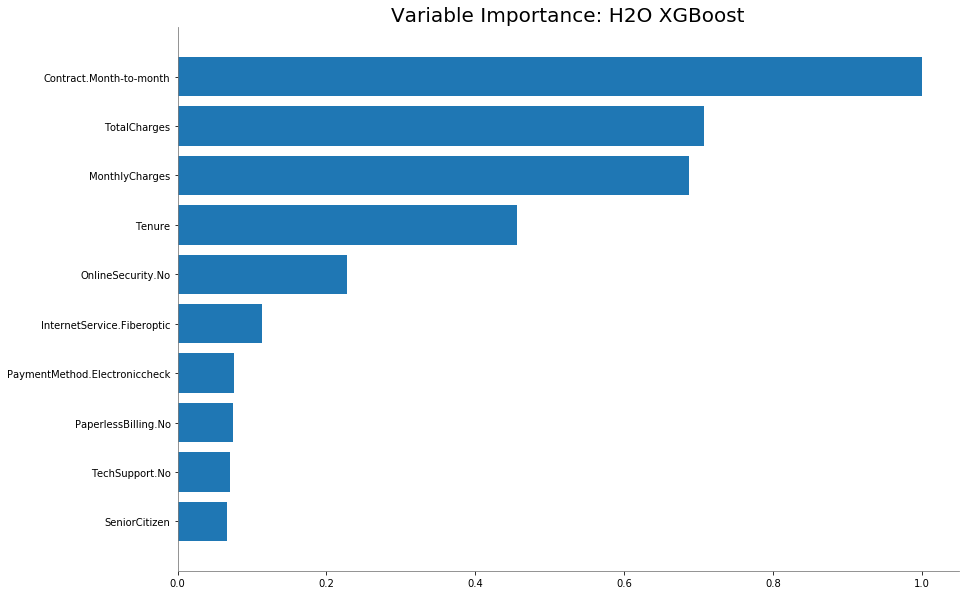

In [194]:
xgboost_model_local.varimp_plot()

#### Partial Dependence Plot

PartialDependence: Partial Dependence Plot of model XGBoost_model_python_1597013319592_19135 on column 'Total Charges'



total_charges,mean_response,stddev_response,std_error_mean_response
18.8,0.4238615,0.3261315,0.0040483
474.9052632,0.2464518,0.2738153,0.0033989
931.0105263,0.2916773,0.2639648,0.0032766
1387.1157895,0.2316458,0.2615037,0.0032461
1843.2210526,0.2017253,0.2400597,0.0029799
2299.3263158,0.2147928,0.2491192,0.0030923
2755.4315789,0.2225582,0.2517619,0.0031251
3211.5368421,0.2479061,0.2703625,0.0033560
3667.6421053,0.1678940,0.1976482,0.0024534
4123.7473684,0.2350038,0.2451407,0.0030429


[]

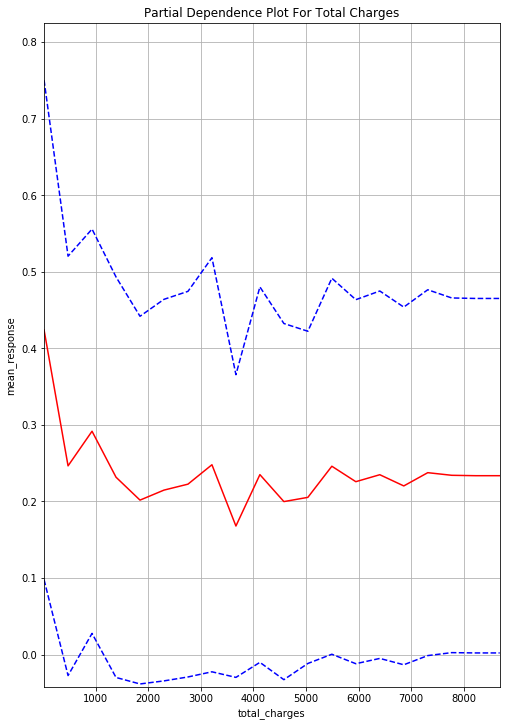

In [196]:
xgboost_model_local.partial_plot(data=df, cols=['Total Charges'], plot=True, plot_stddev=True)

In [209]:
# calculate 2-D partial dependence
h2o.no_progress()
resolution = 20
par_dep_Tenure_v_TotalCharges_XGB = par_dep_2d('Tenure',
                                           'Total Charges',
                                           df,
                                           xgboost_model_local,
                                           resolution=resolution)

print(par_dep_Tenure_v_TotalCharges_XGB)

min1:1.0
max1_72.0
by13.55
min2:18.8
max2_8684.8
by2433.3
     Tenure  Total Charges  partial_dependence
0      1.00           18.8            0.663790
1      1.00          452.1            0.448844
2      1.00          885.4            0.452388
3      1.00         1318.7            0.440986
4      1.00         1752.0            0.448382
5      1.00         2185.3            0.446995
6      1.00         2618.6            0.409245
7      1.00         3051.9            0.461325
8      1.00         3485.2            0.413713
9      1.00         3918.5            0.321572
10     1.00         4351.8            0.547304
11     1.00         4785.1            0.563174
12     1.00         5218.4            0.387827
13     1.00         5651.7            0.385362
14     1.00         6085.0            0.527273
15     1.00         6518.3            0.445609
16     1.00         6951.6            0.467951
17     1.00         7384.9            0.401695
18     1.00         7818.2            0.451002
19

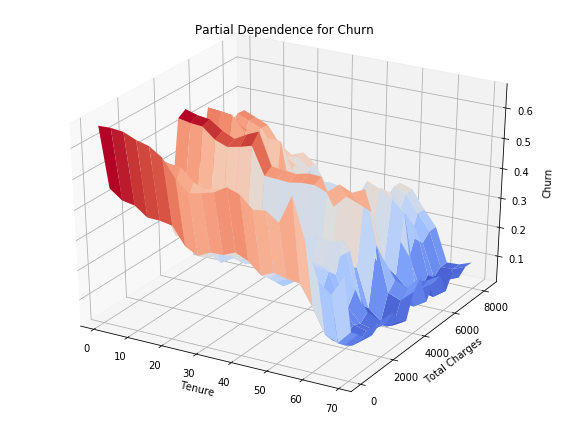

In [210]:
# create 3-D grid 
new_shape = (resolution, resolution)
x = np.asarray(par_dep_Tenure_v_TotalCharges_XGB['Tenure']).reshape(new_shape)
y = np.asarray(par_dep_Tenure_v_TotalCharges_XGB['Total Charges']).reshape(new_shape)
z = np.asarray(par_dep_Tenure_v_TotalCharges_XGB['partial_dependence']).reshape(new_shape)


fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

# set axes labels
ax.set_title('Partial Dependence for Churn')
ax.set_xlabel('Tenure')
ax.set_ylabel('Total Charges')
ax.set_zlabel('\nChurn')

# axis decorators/details
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# surface
surf = ax.plot_surface(x, y, z, 
                       cmap=cm.coolwarm, 
                       linewidth=0.05, 
                       rstride=1, 
                       cstride=1, 
                       antialiased=True)
plt.tight_layout()

_ = plt.show()


#### Individual Conditional Expectation

In [208]:
xgboost_par_dep_TC = par_dep('Total Charges', df, xgboost_model_local)
# xgboost_par_dep_TC.plot.line(x='Total Charges', y='partial_dependence')
# print(xgboost_par_dep_TC)

In [199]:
# quantile_dict = get_quantile_dict('Churn', 'Id', df)

bins = list(xgboost_par_dep_TC['Total Charges'])
for i in sorted(quantile_dict.keys()):
    col_name = 'Percentile_' + str(i)
    xgboost_par_dep_TC[col_name] = par_dep('Total Charges',
                                   df[df['Id'] == int(quantile_dict[i])],
                                   xgboost_model_local,
                                   bins=bins)['partial_dependence']
xgboost_par_dep_TC

,Total Charges,partial_dependence,Percentile_0,Percentile_10,Percentile_20,Percentile_30,Percentile_40,Percentile_50,Percentile_60,Percentile_70,Percentile_80,Percentile_90,Percentile_99
0,18.8,0.574422,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,452.1,0.333128,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,885.4,0.338829,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1318.7,0.310015,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1752.0,0.310786,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,2185.3,0.326965,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6,2618.6,0.306626,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
7,3051.9,0.359168,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8,3485.2,0.290755,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
9,3918.5,0.200462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


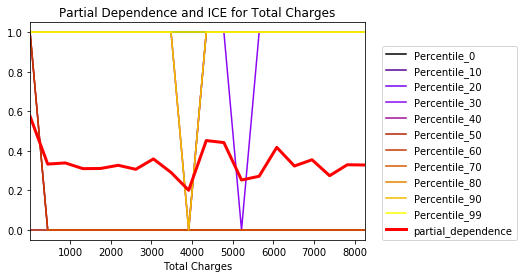

In [202]:
fig, ax = plt.subplots()
xgboost_par_dep_TC.drop('partial_dependence', axis=1).plot(x='Total Charges', colormap='gnuplot', ax=ax)

xgboost_par_dep_TC.plot(title='Partial Dependence and ICE for Total Charges',
                         x='Total Charges', 
                         y='partial_dependence',
                         style='r-', 
                         linewidth=3, 
                         ax=ax)

_ = plt.legend(bbox_to_anchor=(1.05, 0),
               loc=3, 
               borderaxespad=0.)